<a href="https://colab.research.google.com/github/RaihanHeggi/markov_chain_ddos_attack/blob/main/k_means_cluster_of_ddos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [53]:
df = pd.read_csv('https://raw.githubusercontent.com/RaihanHeggi/markov_chain_ddos_attack/main/semi_processed_train.csv', sep=',')
df_2 = pd.read_csv('https://raw.githubusercontent.com/RaihanHeggi/markov_chain_ddos_attack/main/dataset_sdn.csv', sep=';')
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head(1)

,dt,switch,pktcount,bytecount,dur,dur_nsec,flows,packetins,pktrate,Pairflow,Protocol,port_no,tx_bytes,rx_bytes,tx_kbps,rx_kbps,tot_kbps,label
0,0.220956,0.0,0.174242,0.328245,0.053163,0.716717,0.053723,0.066667,0.076883,0.962331,0.996744,0.96243,0.0,1.0,0.5,0.113329,0.000003,0.0


## **Check Optimum Cluster**

Text(0, 0.5, 'SSE')

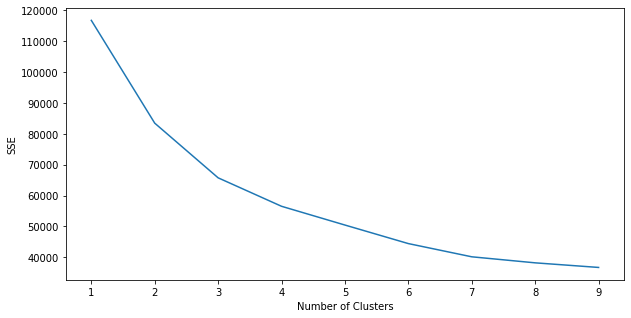

In [54]:
from sklearn import cluster

plt.figure(figsize=(10,5))
numClusters = [1,2,3,4,5,6,7,8,9]
SSE = []
for k in numClusters:
    k_means = cluster.KMeans(n_clusters=k)
    k_means.fit(df)
    SSE.append(k_means.inertia_)

plt.plot(numClusters, SSE)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')

Dilihat dari elbow methods maka posisi cluster bisa dibagi menjadi 3, kemungkinan hal ini disebabkan oleh jenis DDoS TCP, UDP, dan ICMP Flood

In [57]:
#Changing Protocol

df['Protocol'] = df_2['Protocol'] 
df['Protocol'] = df['Protocol'].replace('UDP', 1)
df['Protocol'] = df['Protocol'].replace('TCP', 2)
df['Protocol'] = df['Protocol'].replace('ICMP', 3)


## **PCA Visualization of Cluster**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


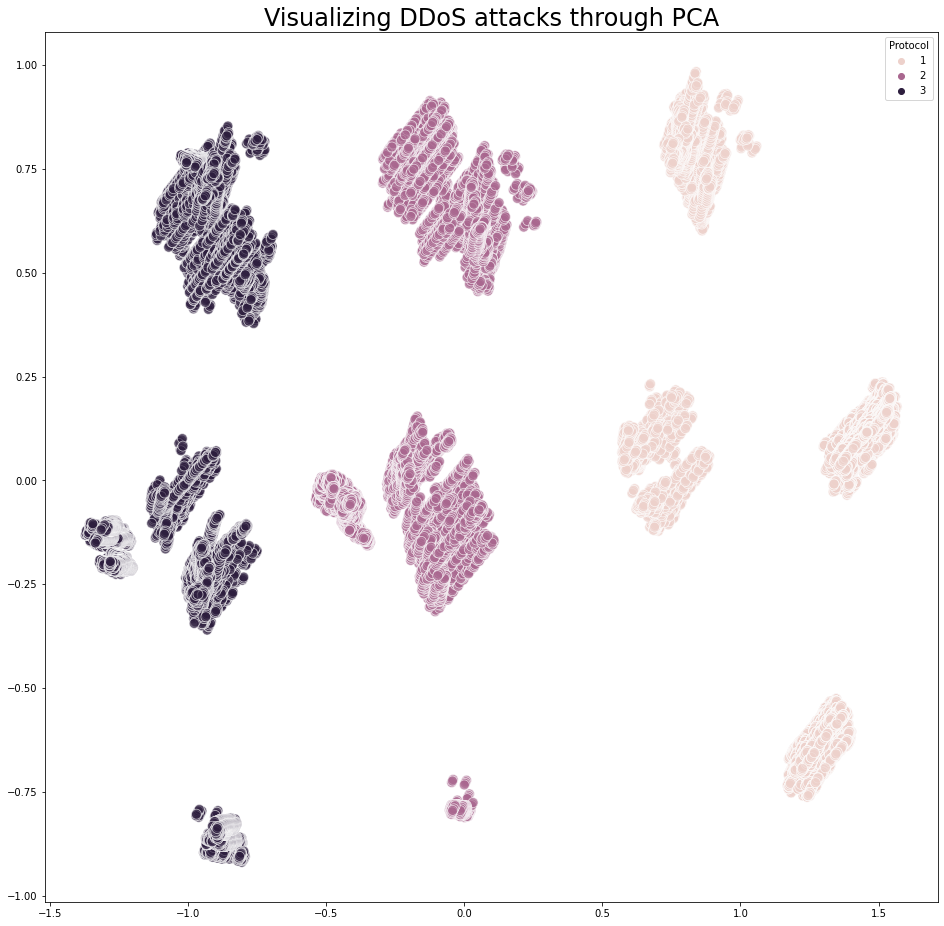

In [58]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) 
principalComponents = pca.fit_transform(df)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(principalComponents[:, 0], principalComponents[:, 1], s= 100, hue=df['Protocol'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through PCA', fontsize=24);

## **T-SNE Cluster Analysis**

In [ ]:
from sklearn.manifold import TSNE

tsne_ = TSNE(random_state = 42, n_components=2,verbose=0, perplexity=40, n_iter=250).fit_transform(principalComponents)
plt.figure(figsize=(16,16))
g1 = sns.scatterplot(tsne_[:, 0], tsne_[:, 1], s= 100, hue=df['Protocol'], cmap='Spectral',alpha=0.7)
plt.title('Visualizing DDoS attacks through t-SNE', fontsize=24);

## **K Means Clustering**

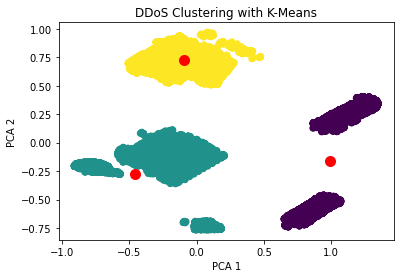

In [50]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3)
Y = kmeans.fit_predict(principalComponents)

plt.scatter(principalComponents[:, 0], principalComponents[:, 1], c= Y )

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=100);
plt.title('DDoS Clustering with K-Means')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()